In [5]:
part.re_pos

array([[[ 11.59969709,   1.97316968],
        [-17.19906798,  -6.88010959]],

       [[ 12.18396157,   2.25709902],
        [-17.62412623,  -6.38888019]],

       [[ 12.76822604,   2.54102836],
        [-18.04918448,  -5.89765078]],

       ..., 
       [[-12.48223524,   7.71428571],
        [  8.46686922,   8.46022057]],

       [[-13.27133799,   8.35714286],
        [  8.39969068,   8.55243011]],

       [[-14.06044074,   9.        ],
        [  8.33251214,   8.64463965]]])

In [14]:
pos[:,:,1].min()

-9.0

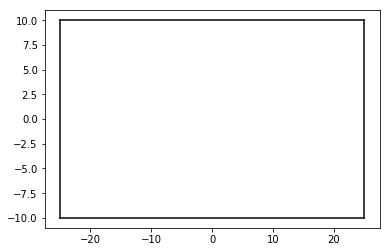

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np


# pos = part.re_pos

fig, ax = plt.subplots()
# x_min, x_max = pos[:,:,0].min(), pos[:,:,0].max()
# y_min, y_max = pos[:,:,1].min(), pos[:,:,1].max()
# ax.axis([x_min, x_max, y_min, y_max])
steps = 10
pos = part.re_pos[:steps+1]
dpos = np.diff(part.re_pos, axis=0)


cell = part.re_cell[:steps+1].T
cell_range = [2 * part.cell_size[d] * np.arange(cell[d].min(), cell[d].max()+1) for d in range(part.dim)]
cell_range

translates = it.product(*cell_range)

if part.dim == 2:
    ax = fig.gca()
    for trans in translates:
        for w in wall:
            ax.plot(*(w.mesh + trans).T, color='black')

In [5]:
x_m, x_M, y_m, y_M = -part.cell_size[0], part.cell_size[0], -part.cell_size[1], part.cell_size[1]


cell_range = [2 * part.cell_size[d] * np.arange(cell[d].min(), cell[d].max()+1) for d in range(part.dim)]
ax.axis([x_m, x_M, y_m, y_M]);

l, = ax.plot([],[]);

def animate(i):
    x = part.re_pos[:i,:,0]
    x = part.re_pos[:i,:,0]
    
            cell = part.re_cell[:steps+1].T
        cell_range = [2 * part.cell_size[d] * np.arange(cell[d].min(), cell[d].max()+1) for d in range(part.dim)]

    
    t_hist = t[:i+1]
    x_hist = x[:i+1]
    t_max = t_hist.max()+0.01
#     print(t_max)
#     t_max = 2*np.pi*(i+2)/(i+1)
#     print(t_max)
    ax.axis([0,t_max,-1,1])
#     ax.axis([0,2*np.pi,-1,1])
#     ax.axis([0,2*np.pi*(i+2)/(i+1),-1,1])

    l.set_data(t_hist, x_hist)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t)-5);

from IPython.display import HTML, display
display(HTML(ani.to_jshtml()))
print()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 44)

In [14]:
x.shape

(50,)

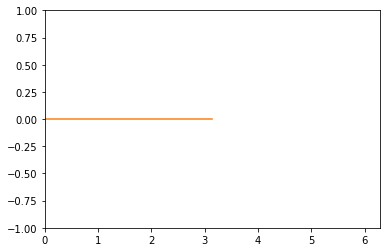

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots();
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])
ax.plot([0,np.pi],[0,0])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t));

from IPython.display import HTML
HTML(ani.to_jshtml())

In [9]:
dts = np.diff(t)
min_frames = dts[dts > abs_tol].min()
num_frames = np.round(dts / min_frames)
num_frames[num_frames==0] = 1

array([  1.00000000e+00,   6.66641463e+03,   7.02718816e+03,
         2.67066319e+03,   7.07053407e+03,   4.72199293e+03,
         4.72199293e+03,   4.72199293e+03,   2.67641242e+03,
         2.67641242e+03,   7.68744412e+03,   7.68744412e+03,
         7.68744412e+03,   7.61443897e+03,   3.32606633e+03,
         3.32606633e+03,   5.14714530e+03,   5.14714530e+03,
         5.14714530e+03,   8.39544142e+03,   7.10040000e+03,
         7.10040000e+03,   8.16966455e+03,   7.83661092e+03,
         7.83661092e+03,   7.30597824e+03,   7.30597824e+03,
         8.43844729e+03,   8.43844729e+03,   7.17682895e+03,
         5.86965679e+03,   5.86965679e+03,   7.14076325e+03,
         7.14076325e+03,   4.71967251e+03,   4.71967251e+03,
         6.90534463e+03,   7.32487855e+03,   7.32487855e+03,
         7.07615970e+03,   7.07615970e+03,   7.04795564e+03,
         7.04795564e+03,   7.33996971e+03,   7.33996971e+03,
         6.90926063e+03,   4.71544694e+03,   4.71544694e+03,
         7.17795859e+03,

In [3]:
%matplotlib inline
seed = 42
dim = 2
%run -i billiard_defs.py

R_particle = 1

x_0 = 25*R_particle
y_0 = 10*R_particle

wall = [FlatWall(dim=dim, base_point=[-x_0, 0], normal=[1, 0], tangents=[0, y_0], collision_law='no_slip',gap_pad=R_particle)
        ,FlatWall(dim=dim, base_point=[x_0, 0], normal=[-1, 0], tangents=[0, -y_0], collision_law='no_slip',gap_pad=R_particle)
        ,FlatWall(dim=dim, base_point=[0, -y_0], normal=[0, 1], tangents=[-x_0, 0], collision_law='no_slip',gap_pad=R_particle)
        ,FlatWall(dim=dim, base_point=[0, y_0], normal=[0, -1], tangents=[x_0, 0], collision_law='no_slip',gap_pad=R_particle)
#         ,SphereWall(dim=dim, base_point=[0,0], radius=R_scatter, gap_pad=R_particle, collision_law='no_slip')
#         ,SphereWall(dim=dim, base_point=[-x_0, -y_0], radius=R_scatter, gap_pad=R_particle, collision_law='no_slip')
#         ,SphereWall(dim=dim, base_point=[x_0, -y_0], radius=R_scatter, gap_pad=R_particle, collision_law='no_slip')
#         ,SphereWall(dim=dim, base_point=[-x_0, y_0], radius=R_scatter, gap_pad=R_particle, collision_law='no_slip')
#         ,SphereWall(dim=dim, base_point=[x_0, y_0], radius=R_scatter, gap_pad=R_particle, collision_law='no_slip')
       ]
for (i, w) in enumerate(wall):
    w.idx = i

#x = [[x_0/2, y_0/2], [-x_0/2, y_0/2], [-x_0/2, -y_0/2], [x_0/2, -y_0/2]]
part = Particles(max_steps=100, cell_size=[x_0, y_0], dim=dim, num=2, mass=3, radius=R_particle)
part.set_pos_init()#[[0,0]])#x)
part.set_vel_init()#[[0,1]])#x)
part.set_orient_init()
part.set_spin_init()#[-.5])

run_trial(wall, part)
# smoother(part, max_distort=10, min_frames=10)
smoother(part)#, max_distort=10, min_frames=10)
draw_hist(wall, part, duration=180)

A Jupyter Widget